<div><img src="logo.gif" width="220" ALIGN="left" border="20"></div>
<center><font color="4466ff"> <h1>AutoCV Starting Kit </h1> </font></center>
<br>
<p>This code was tested with docker evariste/autodl:dockerfile 
<p>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS".
UNIVERSITE PARIS SUD, INRIA, CHALEARN, AND/OR OTHER ORGANIZERS
OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES.

# Introduction

* We target applications of multi-label image classification. 
* Raw data are provided, in TF record format.  
* We impose restrictions on training time and resources to push the state-of-the-art further.
* This notebook uses sample data. Download larger datasets from the website of the challenge.

In [1]:
model_dir = 'AutoDL_sample_code_submission/'      # Where the code you should modify is found
lib_dir = 'AutoDL_ingestion_program/'             # Useful libraries used on Codalab
score_dir = 'AutoDL_scoring_program/'             # Scoring program 
from sys import path; path.append(model_dir); path.append(lib_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import warnings; warnings.filterwarnings("ignore")
from os.path import join

<div style="background:#cfdfff">
    <h1> Step 1: Load data </h1>
<p>
We provide sample_data with the starting kit, but you may fetch other public_data from the challenge website and subtitute it to sample_data.
</div>

In [2]:
data_dir = 'AutoDL_sample_data'            # Change this directory and the dataset as needed
data_name = 'Monkeys'
!ls $data_dir*

Monkeys.data  Monkeys.solution	mini.data  mini.solution


In [3]:
from dataset import AutoDLDataset
D_train = AutoDLDataset(join(data_dir, data_name + '.data', "train"))
D_test = AutoDLDataset(join(data_dir, data_name + '.data', "test"))

<div style="background:#cfdfff">
    <h1> Step 2: Exploratory data analysis </h1>
    <br>
    <font color="ff0000"> THIS NEEDS MORE EXAMPLES OF DATA VISUALIZATION. T-SNE? We also need to show the TEXT labels.</font>
</div>


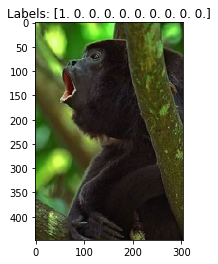

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [4]:
D_train.show_image(2)

<div style="background:#cfdfff">
    <h1>Step 3: Building a predictive model</h1>
    <p>
We provide a simple example of predictive model in the `AutoDL_sample_code_submission/` directory. 
</div>

In [5]:
from model import Model
time_budget=100
M = Model(D_train.get_metadata())

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_service': None, '_global_id_in_cluster': 0, '_task_id': 0, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_save_summary_steps': 100, '_master': '', '_tf_random_seed': None, '_is_chief': True, '_evaluation_master': '', '_model_dir': '/app/codalab/AutoDL_sample_code_submission/../checkpoints_Monkeys', '_keep_checkpoint_every_n_hours': 10000, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa7940e50b8>, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_task_type': 'worker', '_save_checkpoints_steps': None, '_session_config': None}


In [6]:
M.train(D_train.get_dataset(),
                  remaining_time_budget=time_budget)

tensor_ts shape: (3, 224, 224)
MODEL INFO: 19-02-27 20:49:43 Begin training for another 10 steps...
INFO:tensorflow:Calling model_fn.
(?, 3, 224, 224, 1)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /app/codalab/AutoDL_sample_code_submission/../checkpoints_Monkeys/model.ckpt-25
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 26 into /app/codalab/AutoDL_sample_code_submission/../checkpoints_Monkeys/model.ckpt.
INFO:tensorflow:step = 26, loss = 63.172306
INFO:tensorflow:Saving checkpoints for 35 into /app/codalab/AutoDL_sample_code_submission/../checkpoints_Monkeys/model.ckpt.
INFO:tensorflow:Loss for final step: 50.019974.
MODEL INFO: 19-02-27 20:50:06 10 steps trained. 23.09 sec used. Now total steps trained: 10. Total time used for training: 23.09 sec. Current estimated time per step: 2.31e+00 sec

In [7]:
prediction = M.test(D_test.get_dataset(), remaining_time_budget=time_budget)

tensor_ts shape: (3, 224, 224)
MODEL INFO: 19-02-27 20:50:06 Begin testing... 
INFO:tensorflow:Calling model_fn.
(?, 3, 224, 224, 1)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /app/codalab/AutoDL_sample_code_submission/../checkpoints_Monkeys/model.ckpt-35
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
MODEL INFO: 19-02-27 20:50:07 Asserting predictions have the same number of columns...
MODEL INFO: 19-02-27 20:50:07 [+] Successfully made one prediction. 0.69 sec used. Total time used for testing: 0.69 sec. Current estimated time for test: 6.89e-01 sec.


<div style="background:#cfdfff">
<h1> Step 4: Compute score </h1> 
Compute the balanced accuracy for the chosen duration. For this challenge, you will be judged on the area under the learning curve, computed for increasing training times.
</div>

In [8]:
from score import autodl_bac
from libscores import read_array
solution_file = join(data_dir, data_name + '.solution')
solution = read_array(solution_file)
current_bac = autodl_bac(solution, prediction)
print("Normalized balanced accuracy (2*BAC-1) = {:.4f}.".format(current_bac))

Normalized balanced accuracy (2*BAC-1) = 0.6729.


<div style="background:#cfdfff">
<h1> Step 5: Making a submission </h1> 

<h2> Unit testing </h2> 

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>AutoDL_sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
</div>

In [9]:
!python run_local_test.py -dataset_dir=$data_dir -code_dir=$model_dir

Run baseline. Date: 02/07/2019.
SCORING INFO: 19-02-27 20:50:13 Cleaning existing score_dir: /app/codalab/AutoDL_scoring_output
SCORING INFO: 19-02-27 20:50:13 Start scoring program at Wed Feb 27 20:50:13 2019
Traceback (most recent call last):
  File "/app/codalab/AutoDL_scoring_program/score.py", line 365, in <module>
    raise ValueError("Multiple solution files found: {}!".format(solution_names))
ValueError: Multiple solution files found: ['AutoDL_sample_data/Monkeys.solution', 'AutoDL_sample_data/mini.solution']!
INGESTION INFO: 19-02-27 20:50:15 Cleaning existing output_dir: /app/codalab/AutoDL_sample_result_submission
INGESTION INFO: 19-02-27 20:50:15 Cleaning existing checkpoints_dir: /app/codalab/checkpoints_Monkeys
INGESTION INFO: 19-02-27 20:50:15 ========== Ingestion program version 1 ==========
INGESTION INFO: 19-02-27 20:50:15 ************************************************
INGESTION INFO: 19-02-27 20:50:15 ******** Processing dataset Monkeys ********
INGESTION INFO: 19-

<div style="background:#cfdfff">
    <h1> Preparing the submission </h1>

Zip the contents of `AutoDL_sample_code_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.
</div>

In [10]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = 'sample_code_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
print("Submit these file: " + sample_code_submission)

Submit these file: sample_code_submission_19-02-27-20-51.zip
